# MIZORAM

In [425]:
import pandas as pd

# Load the datasets for Mizoram
df_mz_enrolment = pd.read_csv('/content/Mizoram Enrolment State.csv')
df_mz_demographic = pd.read_csv('/content/Mizoram Demographic State.csv')
df_mz_biometric = pd.read_csv('/content/Mizoram Biometric State.csv')

print("Mizoram Enrolment Dataset:")
print(df_mz_enrolment.head())
print(df_mz_enrolment.info())
print(df_mz_enrolment.describe())

print("\nMizoram Demographic Dataset:")
print(df_mz_demographic.head())
print(df_mz_demographic.info())
print(df_mz_demographic.describe())

print("\nMizoram Biometric Dataset:")
print(df_mz_biometric.head())
print(df_mz_biometric.info())
print(df_mz_biometric.describe())

Mizoram Enrolment Dataset:
         date    state   district  pincode  age_0_5  age_5_17  age_18_greater
0  01-09-2025  Mizoram     Aizawl   796001        2         2               0
1  01-09-2025  Mizoram     Aizawl   796012        1         0               0
2  01-09-2025  Mizoram     Aizawl   796111        1         0               0
3  01-09-2025  Mizoram  Lawngtlai   796770        3         0               0
4  01-09-2025  Mizoram  Lawngtlai   796901        0         1               0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1765 entries, 0 to 1764
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            1765 non-null   object
 1   state           1765 non-null   object
 2   district        1765 non-null   object
 3   pincode         1765 non-null   int64 
 4   age_0_5         1765 non-null   int64 
 5   age_5_17        1765 non-null   int64 
 6   age_18_greater  1765 non-null   int64 
dty

In [426]:
merged_df_mz_temp = pd.merge(df_mz_enrolment, df_mz_demographic, on=['date', 'state', 'district', 'pincode'], how='outer')
df_mz_merged = pd.merge(merged_df_mz_temp, df_mz_biometric, on=['date', 'state', 'district', 'pincode'], how='outer')

# Identify numeric columns
numeric_cols = df_mz_merged.select_dtypes(include=['number']).columns

# Replace NaN values in numeric columns with 0
df_mz_merged[numeric_cols] = df_mz_merged[numeric_cols].fillna(0)

# Explicitly convert the 'date' column to datetime objects
df_mz_merged['date'] = pd.to_datetime(df_mz_merged['date'], format='%d-%m-%Y')

print("Merged DataFrame (df_merged) head:")
print(df_mz_merged.head())
print("\nMerged DataFrame (df_merged) info:")
print(df_mz_merged.info())

print("Shape of df_merged:", df_mz_merged.shape)
print("\nInfo of df_mz_merged:")
df_mz_merged.info()
print("\nDescription of df_mz_merged:")
print(df_mz_merged.describe())

df_mz = df_mz_merged[df_mz_merged['state'] == 'Mizoram'].copy()
df_mz['year'] = df_mz['date'].dt.year
df_mz['month'] = df_mz['date'].dt.month

Merged DataFrame (df_merged) head:
        date    state district  pincode  age_0_5  age_5_17  age_18_greater  \
0 2026-01-01  Mizoram   Aizawl   796001      0.0       0.0             0.0   
1 2026-01-01  Mizoram   Aizawl   796005      0.0       0.0             0.0   
2 2026-01-01  Mizoram   Aizawl   796008      0.0       0.0             0.0   
3 2026-01-01  Mizoram   Aizawl   796009      0.0       0.0             0.0   
4 2026-01-01  Mizoram   Aizawl   796014      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  bio_age_17_  
0            0.0           0.0           2.0          2.0  
1            0.0           0.0           1.0          0.0  
2            0.0           1.0           1.0          1.0  
3            0.0           0.0           1.0          1.0  
4            0.0           0.0           1.0          0.0  

Merged DataFrame (df_merged) info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11800 entries, 0 to 11799
Data columns (total 11 c

In [427]:
print("Shape of df_mz:", df_mz.shape)
print("\nFirst 5 rows of df_mz with new 'year' and 'month' columns:")
print(df_mz.head())

Shape of df_mz: (11800, 13)

First 5 rows of df_mz with new 'year' and 'month' columns:
        date    state district  pincode  age_0_5  age_5_17  age_18_greater  \
0 2026-01-01  Mizoram   Aizawl   796001      0.0       0.0             0.0   
1 2026-01-01  Mizoram   Aizawl   796005      0.0       0.0             0.0   
2 2026-01-01  Mizoram   Aizawl   796008      0.0       0.0             0.0   
3 2026-01-01  Mizoram   Aizawl   796009      0.0       0.0             0.0   
4 2026-01-01  Mizoram   Aizawl   796014      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  bio_age_17_  year  month  
0            0.0           0.0           2.0          2.0  2026      1  
1            0.0           0.0           1.0          0.0  2026      1  
2            0.0           1.0           1.0          1.0  2026      1  
3            0.0           0.0           1.0          1.0  2026      1  
4            0.0           0.0           1.0          0.0  2026      1  


In [428]:
age_columns = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']

df_mz_agg = df_mz.groupby(['year', 'month', 'state', 'district'])[age_columns].sum().reset_index()

print("Aggregated DataFrame (df_mz_agg) head:")
print(df_mz_agg.head())
print("\nAggregated DataFrame (df_mz_agg) info:")
print(df_mz_agg.info())

Aggregated DataFrame (df_mz_agg) head:
   year  month    state   district  age_0_5  age_5_17  age_18_greater  \
0  2025      3  Mizoram     Aizawl      0.0       0.0             0.0   
1  2025      3  Mizoram   Champhai      0.0       0.0             0.0   
2  2025      3  Mizoram    Kolasib      0.0       0.0             0.0   
3  2025      3  Mizoram  Lawngtlai      0.0       0.0             0.0   
4  2025      3  Mizoram    Lunglei      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  bio_age_17_  
0          652.0        5121.0       12080.0       3703.0  
1          147.0        1612.0        6324.0       1528.0  
2          171.0        1103.0        3984.0        962.0  
3           94.0        1264.0        3058.0        915.0  
4          582.0        3274.0        4383.0       1393.0  

Aggregated DataFrame (df_mz_agg) info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 11 columns):
 #   Column      

In [429]:
import numpy as np

# 1. Create 'totalenrolments' column
df_mz_agg['totalenrolments'] = df_mz_agg['age_0_5'] + df_mz_agg['age_5_17'] + df_mz_agg['age_18_greater']

# 2. Create 'childenrolments' column
df_mz_agg['childenrolments'] = df_mz_agg['age_0_5'] + df_mz_agg['age_5_17']

# 3. Create 'totaldemoupdates' column
df_mz_agg['totaldemoupdates'] = df_mz_agg['demo_age_5_17'] + df_mz_agg['demo_age_17_']

# 4. Create 'totalbioupdates' column
df_mz_agg['totalbioupdates'] = df_mz_agg['bio_age_5_17'] + df_mz_agg['bio_age_17_']

# 5. Calculate 'CES' (Child Enrolment Score) with division by zero handling
df_mz_agg['CES'] = np.where(
    df_mz_agg['totalenrolments'] == 0,
    0,
    df_mz_agg['childenrolments'] / df_mz_agg['totalenrolments']
)

# 6. Calculate 'DUR' (Demographic Update Rate) with division by zero handling
df_mz_agg['DUR'] = np.where(
    df_mz_agg['totalenrolments'] == 0,
    0,
    df_mz_agg['totaldemoupdates'] / df_mz_agg['totalenrolments']
)

# 7. Calculate 'BUR' (Biometric Update Rate) with division by zero handling
df_mz_agg['BUR'] = np.where(
    df_mz_agg['totalenrolments'] == 0,
    0,
    df_mz_agg['totalbioupdates'] / df_mz_agg['totalenrolments']
)

# 8. Display the head of the DataFrame
print("Aggregated DataFrame (df_mz_agg) with new metrics head:")
print(df_mz_agg.head())

Aggregated DataFrame (df_mz_agg) with new metrics head:
   year  month    state   district  age_0_5  age_5_17  age_18_greater  \
0  2025      3  Mizoram     Aizawl      0.0       0.0             0.0   
1  2025      3  Mizoram   Champhai      0.0       0.0             0.0   
2  2025      3  Mizoram    Kolasib      0.0       0.0             0.0   
3  2025      3  Mizoram  Lawngtlai      0.0       0.0             0.0   
4  2025      3  Mizoram    Lunglei      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  bio_age_17_  totalenrolments  \
0          652.0        5121.0       12080.0       3703.0              0.0   
1          147.0        1612.0        6324.0       1528.0              0.0   
2          171.0        1103.0        3984.0        962.0              0.0   
3           94.0        1264.0        3058.0        915.0              0.0   
4          582.0        3274.0        4383.0       1393.0              0.0   

   childenrolments  totaldemoupdates

In [430]:
def min_max_normalize(series):
    min_val = series.min()
    max_val = series.max()
    if max_val == min_val:
        return 0  # Handle division by zero case
    return (series - min_val) / (max_val - min_val)

# Apply min-max normalization to 'totalenrolments', grouped by 'year' and 'state'
df_mz_agg['Enorm'] = df_mz_agg.groupby(['year', 'state'])['totalenrolments'].transform(min_max_normalize)

# Apply min-max normalization to 'totaldemoupdates', grouped by 'year' and 'state'
df_mz_agg['Dnorm'] = df_mz_agg.groupby(['year', 'state'])['totaldemoupdates'].transform(min_max_normalize)

# Apply min-max normalization to 'totalbioupdates', grouped by 'year', 'month' and 'state'
df_mz_agg['Bnorm'] = df_mz_agg.groupby(['year', 'state'])['totalbioupdates'].transform(min_max_normalize)

# Calculate 'stdnorm' by combining the normalized metrics
df_mz_agg['stdnorm'] = (df_mz_agg['Enorm'] + df_mz_agg['Dnorm'] + df_mz_agg['Bnorm']) / 3

# Compute 'ALBI' (Aadhaar Lifecycle Balance Index) as 1 - stdnorm
df_mz_agg['ALBI'] = 1 - df_mz_agg['stdnorm']

# Clip the values in the 'ALBI' column to ensure they are between 0 and 1
df_mz_agg['ALBI'] = df_mz_agg['ALBI'].clip(lower=0, upper=1)

# Display the head of the DataFrame to show the newly created columns
print("Aggregated DataFrame (df_mz_agg) with normalized metrics, ALBI and riskscore head:")
print(df_mz_agg.head())

Aggregated DataFrame (df_mz_agg) with normalized metrics, ALBI and riskscore head:
   year  month    state   district  age_0_5  age_5_17  age_18_greater  \
0  2025      3  Mizoram     Aizawl      0.0       0.0             0.0   
1  2025      3  Mizoram   Champhai      0.0       0.0             0.0   
2  2025      3  Mizoram    Kolasib      0.0       0.0             0.0   
3  2025      3  Mizoram  Lawngtlai      0.0       0.0             0.0   
4  2025      3  Mizoram    Lunglei      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  ...  totaldemoupdates  \
0          652.0        5121.0       12080.0  ...            5773.0   
1          147.0        1612.0        6324.0  ...            1759.0   
2          171.0        1103.0        3984.0  ...            1274.0   
3           94.0        1264.0        3058.0  ...            1358.0   
4          582.0        3274.0        4383.0  ...            3856.0   

   totalbioupdates  CES  DUR  BUR  Enorm     Dnorm 

In [431]:
# Risk normalization for each metric
df_mz_agg['Enormrisk'] = 1 - df_mz_agg['Enorm']
df_mz_agg['CESrisknorm'] = 1 - df_mz_agg['CES']
df_mz_agg['DURrisknorm'] = 1 - df_mz_agg['DUR']
df_mz_agg['BURrisknorm'] = 1 - df_mz_agg['BUR']
df_mz_agg['ALBIrisknorm'] = 1 - df_mz_agg['ALBI']

# Calculate the 'riskscore' by summing the risk components, averaging, and scaling to 0-100
df_mz_agg['riskscore'] = (
    df_mz_agg['Enormrisk'] +
    df_mz_agg['CESrisknorm'] +
    df_mz_agg['DURrisknorm'] +
    df_mz_agg['BURrisknorm'] +
    df_mz_agg['ALBIrisknorm']
) / 5 * 100

# Display the head of the DataFrame to show the newly created risk-related columns
print("Aggregated DataFrame (df_mz_agg) with risk components and riskscore head:")
print(df_mz_agg.head())


Aggregated DataFrame (df_mz_agg) with risk components and riskscore head:
   year  month    state   district  age_0_5  age_5_17  age_18_greater  \
0  2025      3  Mizoram     Aizawl      0.0       0.0             0.0   
1  2025      3  Mizoram   Champhai      0.0       0.0             0.0   
2  2025      3  Mizoram    Kolasib      0.0       0.0             0.0   
3  2025      3  Mizoram  Lawngtlai      0.0       0.0             0.0   
4  2025      3  Mizoram    Lunglei      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  ...     Dnorm     Bnorm  \
0          652.0        5121.0       12080.0  ...  1.000000  1.000000   
1          147.0        1612.0        6324.0  ...  0.304694  0.497434   
2          171.0        1103.0        3984.0  ...  0.220682  0.313288   
3           94.0        1264.0        3058.0  ...  0.235233  0.251632   
4          582.0        3274.0        4383.0  ...  0.667937  0.365883   

    stdnorm      ALBI  Enormrisk  CESrisknorm  D

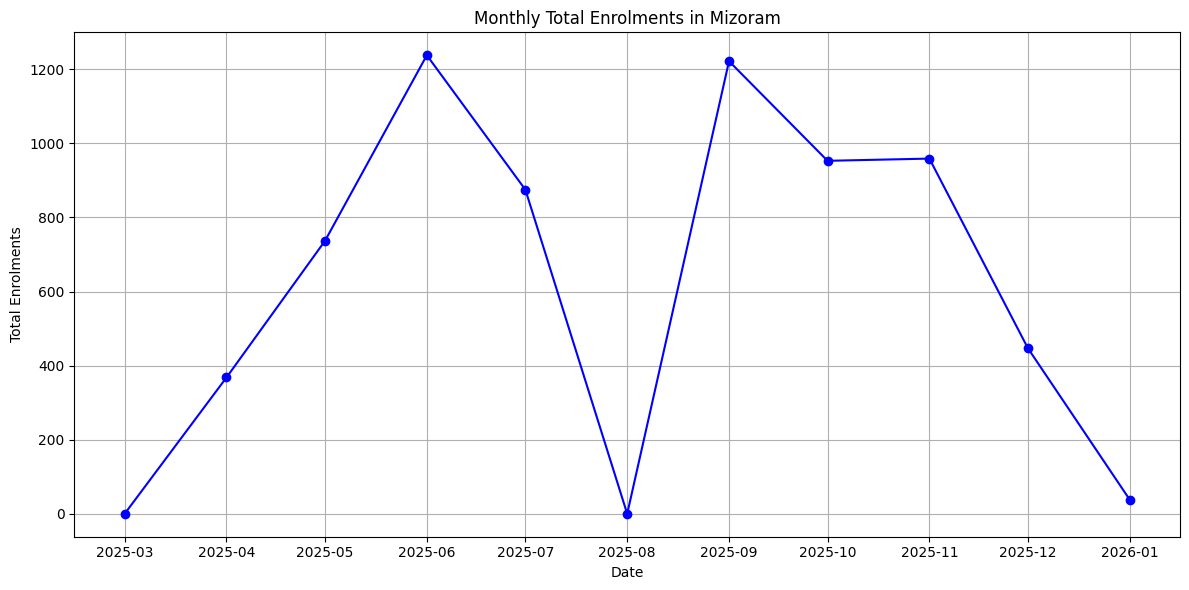

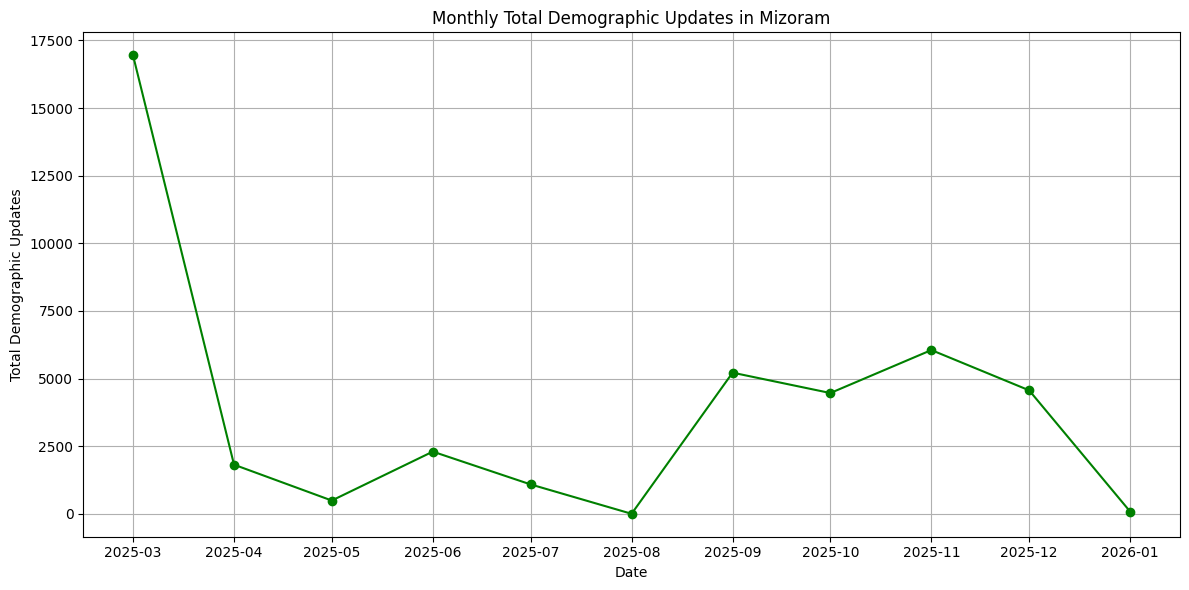

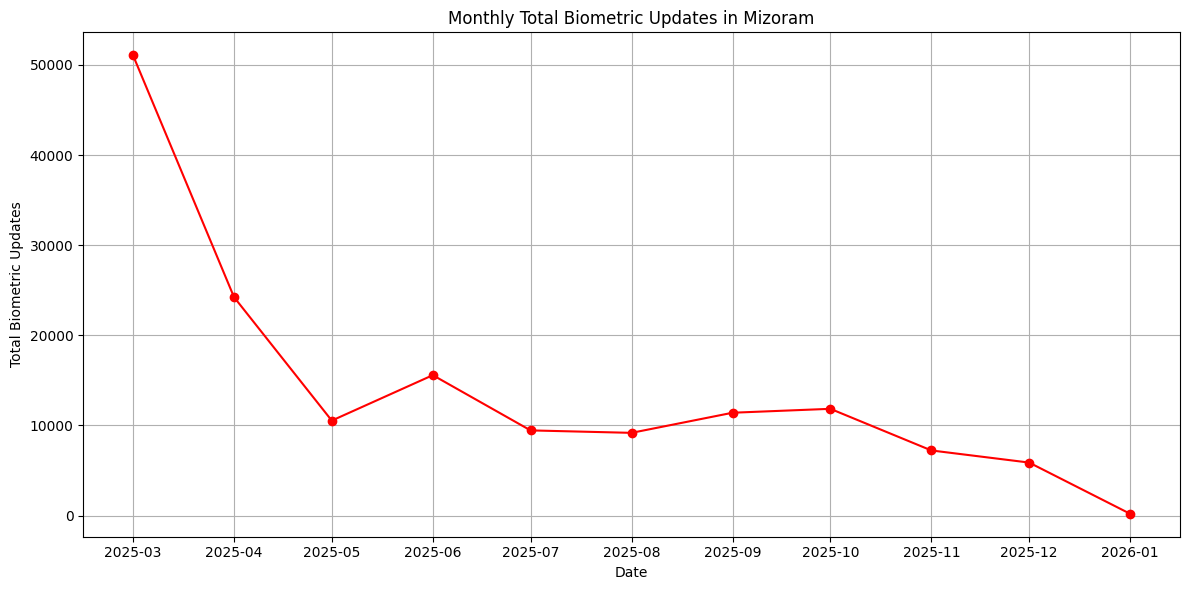

Monthly trend plots generated successfully.


In [432]:
import matplotlib.pyplot as plt

df_mz_monthly_trends = df_mz_agg.groupby(['year', 'month']).agg({
    'totalenrolments': 'sum',
    'totaldemoupdates': 'sum',
    'totalbioupdates': 'sum'
}).reset_index()

# Create a date column for plotting
df_mz_monthly_trends['date'] = pd.to_datetime(df_mz_monthly_trends['year'].astype(str) + '-' + df_mz_monthly_trends['month'].astype(str) + '-01')

# Sort by date to ensure proper trend plotting
df_mz_monthly_trends = df_mz_monthly_trends.sort_values(by='date')

# Plotting totalenrolments monthly trend
plt.figure(figsize=(12, 6))
plt.plot(df_mz_monthly_trends['date'], df_mz_monthly_trends['totalenrolments'], marker='o', linestyle='-', color='blue')
plt.xlabel('Date')
plt.ylabel('Total Enrolments')
plt.title('Monthly Total Enrolments in Mizoram')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting totaldemoupdates monthly trend
plt.figure(figsize=(12, 6))
plt.plot(df_mz_monthly_trends['date'], df_mz_monthly_trends['totaldemoupdates'], marker='o', linestyle='-', color='green')
plt.xlabel('Date')
plt.ylabel('Total Demographic Updates')
plt.title('Monthly Total Demographic Updates in Mizoram')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting totalbioupdates monthly trend
plt.figure(figsize=(12, 6))
plt.plot(df_mz_monthly_trends['date'], df_mz_monthly_trends['totalbioupdates'], marker='o', linestyle='-', color='red')
plt.xlabel('Date')
plt.ylabel('Total Biometric Updates')
plt.title('Monthly Total Biometric Updates in Mizoram')
plt.grid(True)
plt.tight_layout()
plt.show()

print("Monthly trend plots generated successfully.")

**Univariate Analysis**

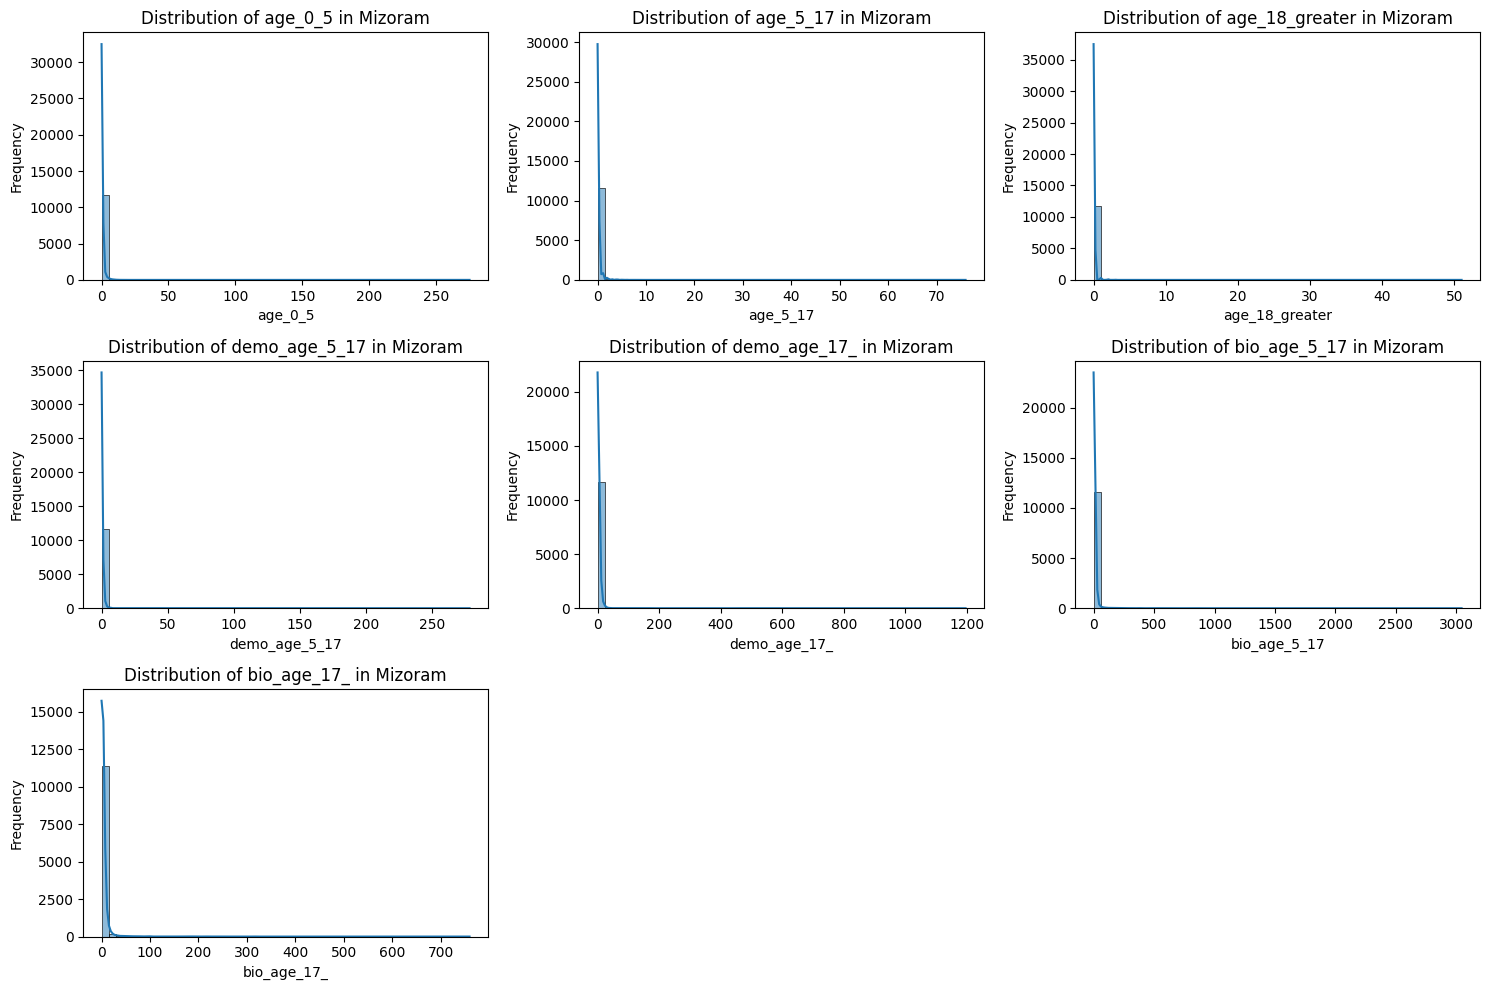

Histograms for numerical age-related columns displayed for Mizoram.


In [433]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical age-related columns from df_mz_merged
numerical_age_cols = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_age_cols):
    plt.subplot(3, 3, i + 1) # Adjust subplot grid based on number of columns
    sns.histplot(df_mz_merged[col], bins=50, kde=True)
    plt.title(f'Distribution of {col} in Mizoram')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

print("Histograms for numerical age-related columns displayed for Mizoram.")

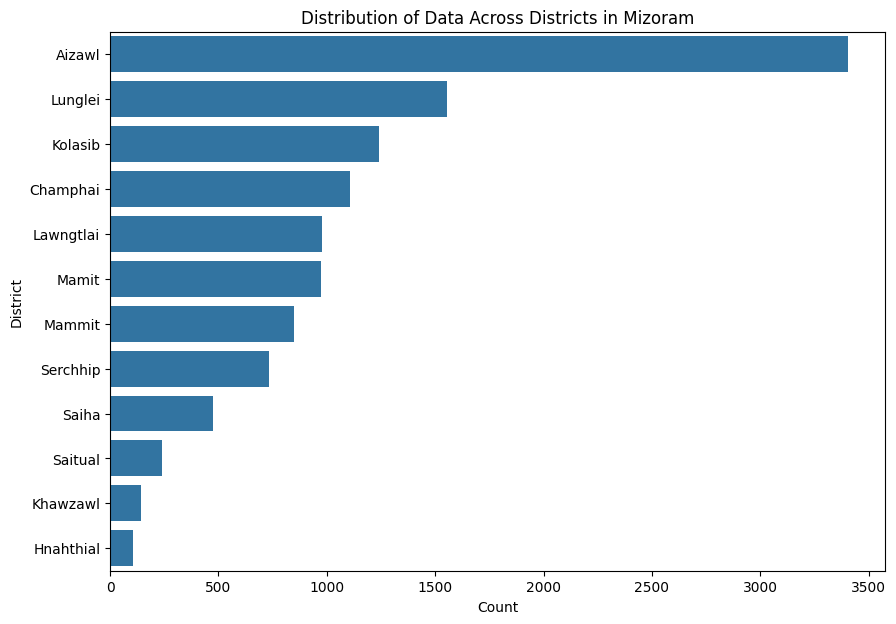

Count plot for 'district' displayed for Mizoram.


In [434]:
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.countplot(data=df_mz_merged, y='district', order=df_mz_merged['district'].value_counts().index)
plt.title('Distribution of Data Across Districts in Mizoram')
plt.xlabel('Count')
plt.ylabel('District')
plt.show()

print("Count plot for 'district' displayed for Mizoram.")

**Bivariate and Trivariate Analysis**

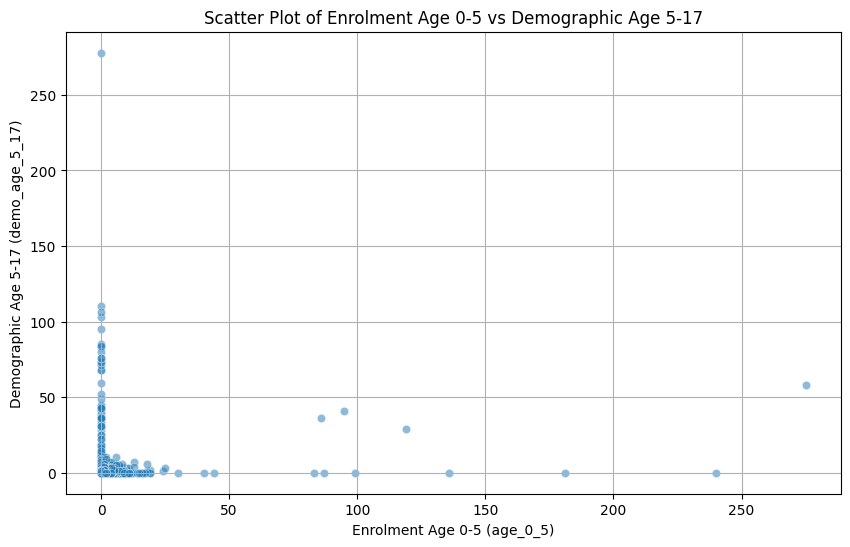

Insight: There appears to be a weak positive correlation between 'age_0_5' and 'demo_age_5_17', though many data points are clustered at the lower ends of both variables.


In [435]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_mz_merged, x='age_0_5', y='demo_age_5_17', alpha=0.5)
plt.title('Scatter Plot of Enrolment Age 0-5 vs Demographic Age 5-17')
plt.xlabel('Enrolment Age 0-5 (age_0_5)')
plt.ylabel('Demographic Age 5-17 (demo_age_5_17)')
plt.grid(True)
plt.show()

print("Insight: There appears to be a weak positive correlation between 'age_0_5' and 'demo_age_5_17', though many data points are clustered at the lower ends of both variables.")

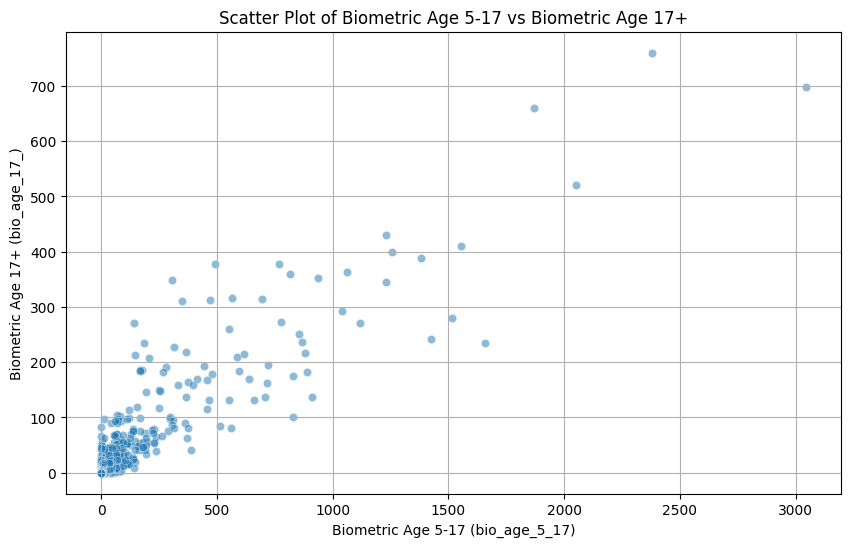

Insight: The scatter plot reveals a positive correlation between 'bio_age_5_17' and 'bio_age_17_', indicating that higher biometric counts in one age group often correspond to higher counts in the other.


In [436]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_mz_merged, x='bio_age_5_17', y='bio_age_17_', alpha=0.5)
plt.title('Scatter Plot of Biometric Age 5-17 vs Biometric Age 17+')
plt.xlabel('Biometric Age 5-17 (bio_age_5_17)')
plt.ylabel('Biometric Age 17+ (bio_age_17_)')
plt.grid(True)
plt.show()

print("Insight: The scatter plot reveals a positive correlation between 'bio_age_5_17' and 'bio_age_17_', indicating that higher biometric counts in one age group often correspond to higher counts in the other.")

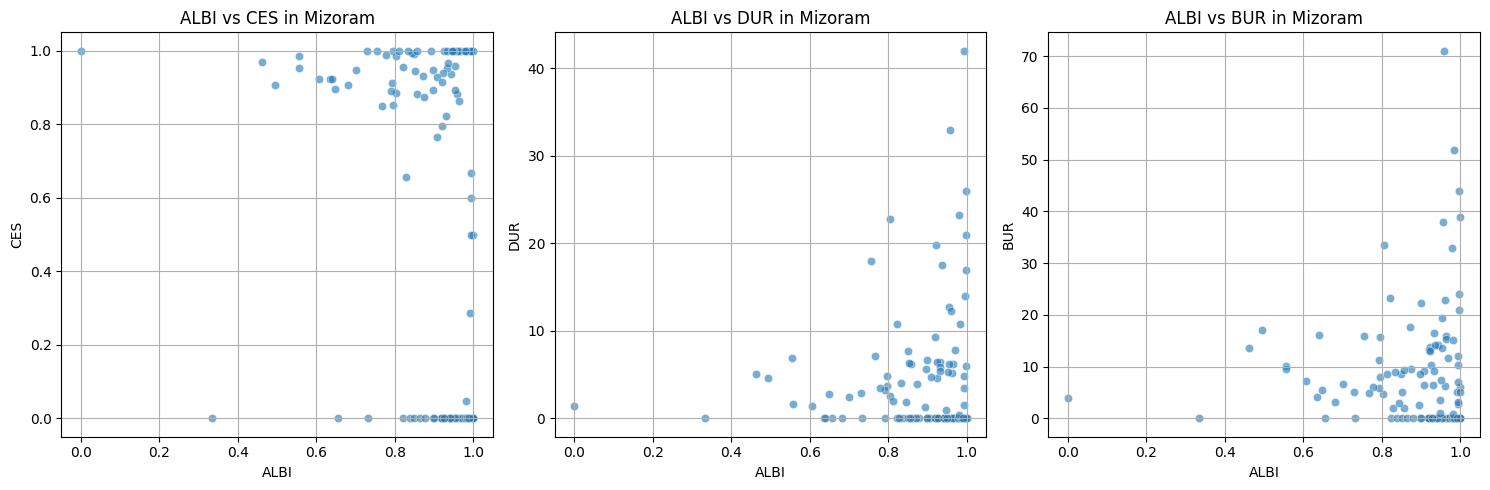

In [437]:
import matplotlib.pyplot as plt
import seaborn as sns

metrics_for_albi_scatter = ['CES', 'DUR', 'BUR']

plt.figure(figsize=(15, 5))
for i, metric in enumerate(metrics_for_albi_scatter):
    plt.subplot(1, 3, i + 1)
    sns.scatterplot(data=df_mz_agg, x='ALBI', y=metric, alpha=0.6)
    plt.title(f'ALBI vs {metric} in Mizoram')
    plt.xlabel('ALBI')
    plt.ylabel(metric)
    plt.grid(True)
plt.tight_layout()
plt.show()

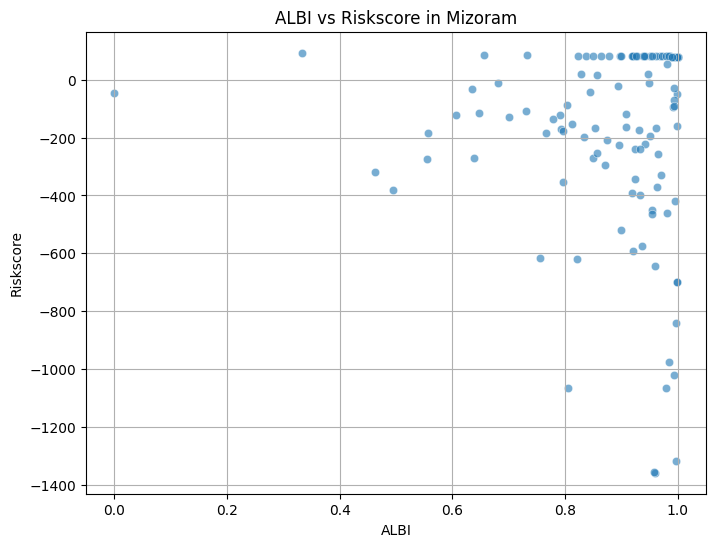

Bivariate analysis scatter plots for ALBI vs CES, DUR, BUR, and Riskscore displayed for Mizoram.


In [438]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_mz_agg, x='ALBI', y='riskscore', alpha=0.6)
plt.title('ALBI vs Riskscore in Mizoram')
plt.xlabel('ALBI')
plt.ylabel('Riskscore')
plt.grid(True)
plt.show()

print("Bivariate analysis scatter plots for ALBI vs CES, DUR, BUR, and Riskscore displayed for Mizoram.")

Correlation Matrix:
                 age_0_5  age_5_17  age_18_greater  demo_age_5_17  \
age_0_5         1.000000  0.897530        0.669149       0.110826   
age_5_17        0.897530  1.000000        0.758343       0.117125   
age_18_greater  0.669149  0.758343        1.000000       0.069611   
demo_age_5_17   0.110826  0.117125        0.069611       1.000000   
demo_age_17_    0.180989  0.191263        0.128643       0.855334   
bio_age_5_17    0.131386  0.114930        0.066983       0.707103   
bio_age_17_     0.219958  0.192519        0.146186       0.648218   

                demo_age_17_  bio_age_5_17  bio_age_17_  
age_0_5             0.180989      0.131386     0.219958  
age_5_17            0.191263      0.114930     0.192519  
age_18_greater      0.128643      0.066983     0.146186  
demo_age_5_17       0.855334      0.707103     0.648218  
demo_age_17_        1.000000      0.749302     0.728853  
bio_age_5_17        0.749302      1.000000     0.904050  
bio_age_17_         0

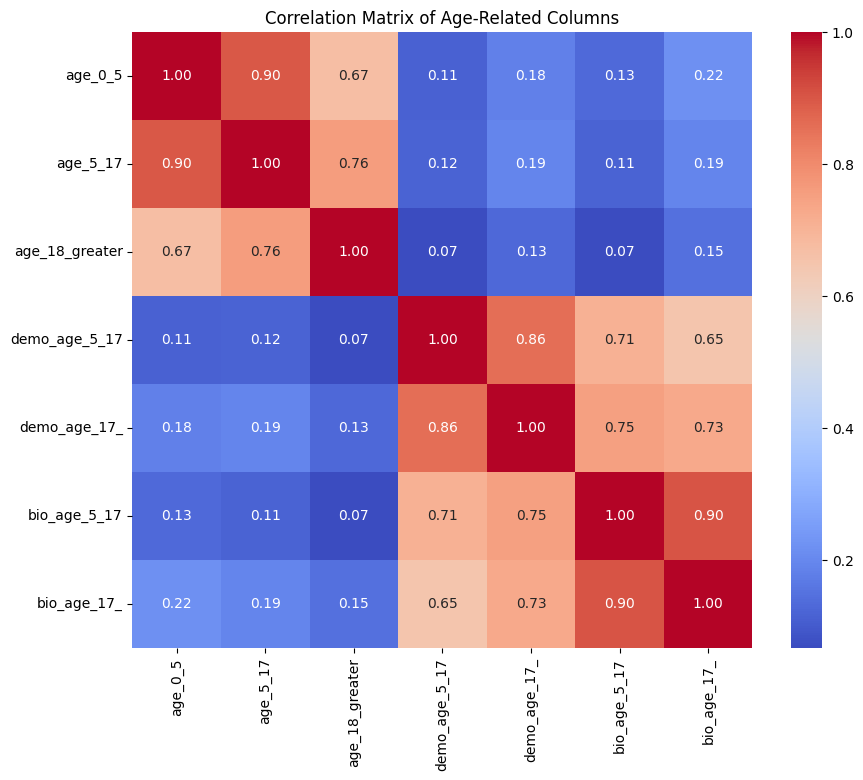

Insight: The heatmap visually confirms the correlation strengths and directions among the age-related variables, highlighting strong positive correlations within demographic and biometric groups, and weaker correlations between different data sources.


In [439]:
numerical_age_cols = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']
correlation_matrix = df_mz_merged[numerical_age_cols].corr()

print("Correlation Matrix:")
print(correlation_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Age-Related Columns')
plt.show()

print("Insight: The heatmap visually confirms the correlation strengths and directions among the age-related variables, highlighting strong positive correlations within demographic and biometric groups, and weaker correlations between different data sources.")

In [440]:
age_cols_to_group = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']
df_district_mean = df_mz_merged.groupby('district')[age_cols_to_group].mean().reset_index()

print("District-wise average age-related data:")
print(df_district_mean.head())
print(df_district_mean.info())

District-wise average age-related data:
    district   age_0_5  age_5_17  age_18_greater  demo_age_5_17  demo_age_17_  \
0     Aizawl  0.288106  0.089574        0.020264       0.412922      3.322467   
1   Champhai  0.850814  0.246835        0.084991       0.519892      4.875226   
2  Hnahthial  0.028846  0.000000        0.009615       0.038462      0.519231   
3   Khawzawl  0.048951  0.055944        0.174825       0.048951      0.293706   
4    Kolasib  0.213882  0.058111        0.033898       0.508475      2.638418   

   bio_age_5_17  bio_age_17_  
0      9.947724     5.138913  
1     11.823689     5.753165  
2      0.365385     0.788462  
3      0.251748     0.930070  
4      7.808717     3.882163  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   district        12 non-null     object 
 1   age_0_5         12 non-null     float64
 2   

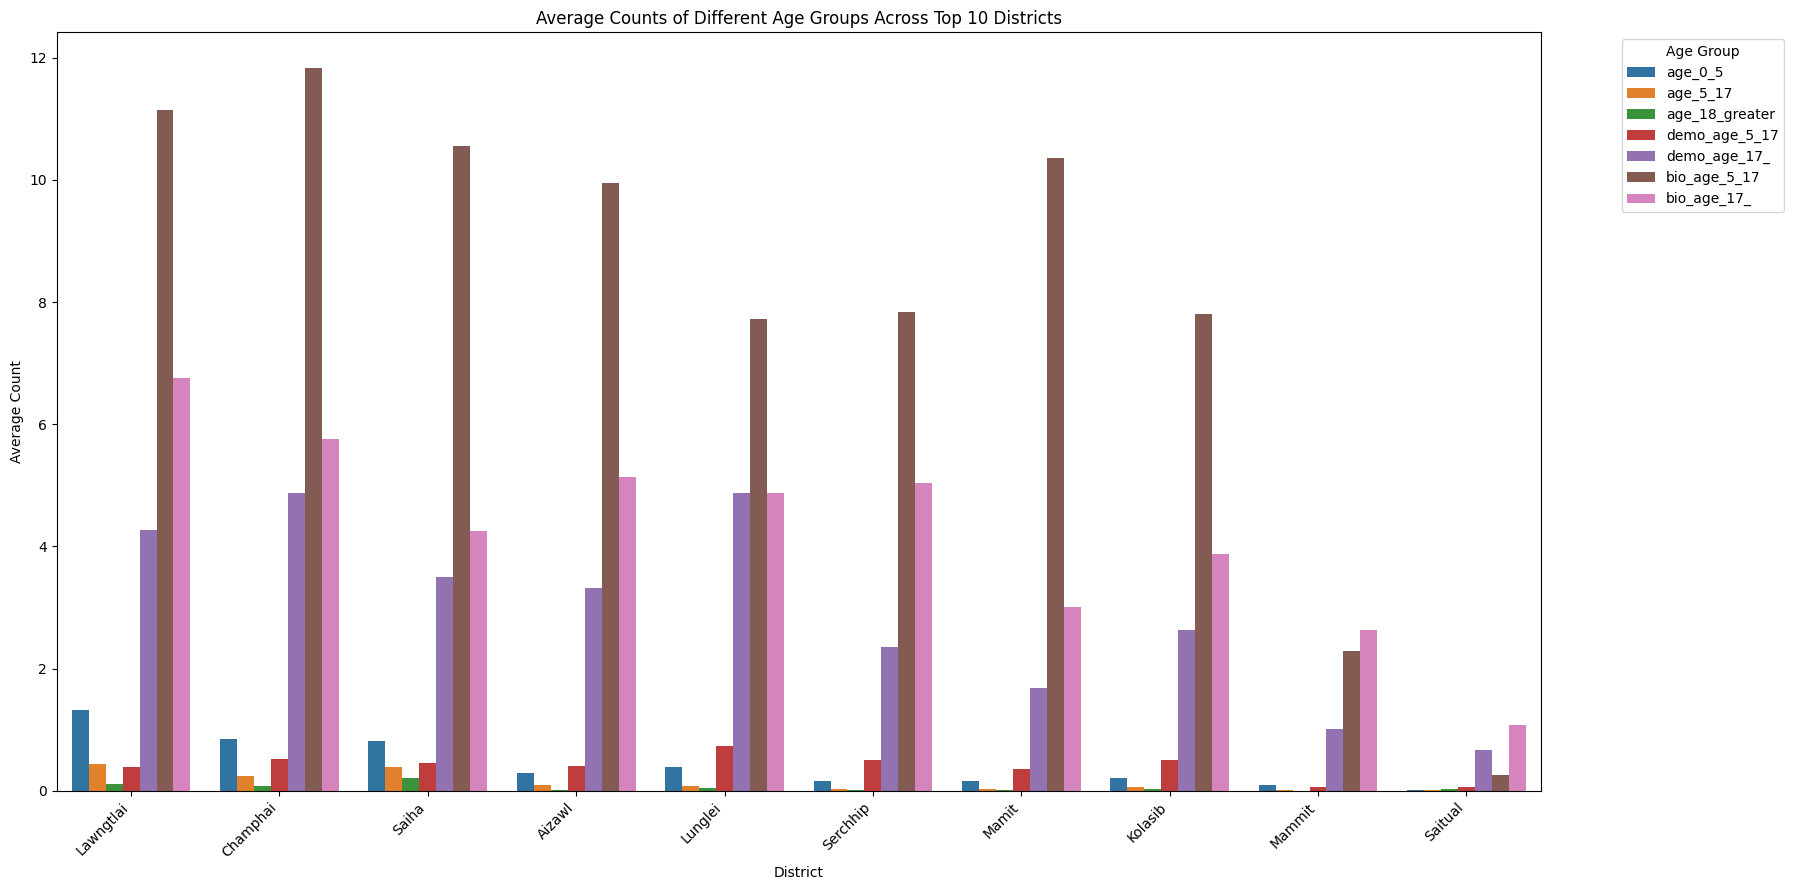

Insight: The grouped bar chart shows the distribution of average enrolment, demographic, and biometric counts across the top 10 districts, highlighting which districts have higher overall activity and the relative contribution of each age group.


In [441]:
df_district_mean['total_avg_age'] = df_district_mean[age_cols_to_group].sum(axis=1)
df_district_mean_top10 = df_district_mean.nlargest(10, 'total_avg_age')

df_district_mean_melted = df_district_mean_top10.melt(
    id_vars=['district'],
    value_vars=age_cols_to_group,
    var_name='Age Group',
    value_name='Average Count'
)

plt.figure(figsize=(18, 9))
sns.barplot(data=df_district_mean_melted, x='district', y='Average Count', hue='Age Group', palette='tab10')
plt.title('Average Counts of Different Age Groups Across Top 10 Districts')
plt.xlabel('District')
plt.ylabel('Average Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print("Insight: The grouped bar chart shows the distribution of average enrolment, demographic, and biometric counts across the top 10 districts, highlighting which districts have higher overall activity and the relative contribution of each age group.")

Time-series aggregated data (sum of age-related columns per date):
        date  age_0_5  age_5_17  age_18_greater  demo_age_5_17  demo_age_17_  \
0 2025-03-01      0.0       0.0             0.0         2074.0       14880.0   
1 2025-04-01    275.0      76.0            17.0          260.0        1556.0   
2 2025-05-01    475.0     154.0           108.0           76.0         414.0   
3 2025-05-20      0.0       0.0             0.0            0.0           0.0   
4 2025-05-21      0.0       0.0             0.0            0.0           0.0   

   bio_age_5_17  bio_age_17_  
0       40071.0      10998.0  
1       17652.0       6583.0  
2        4733.0       3187.0  
3          80.0        161.0  
4          96.0        144.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            231 non-null    datetime64[ns]
 1   a

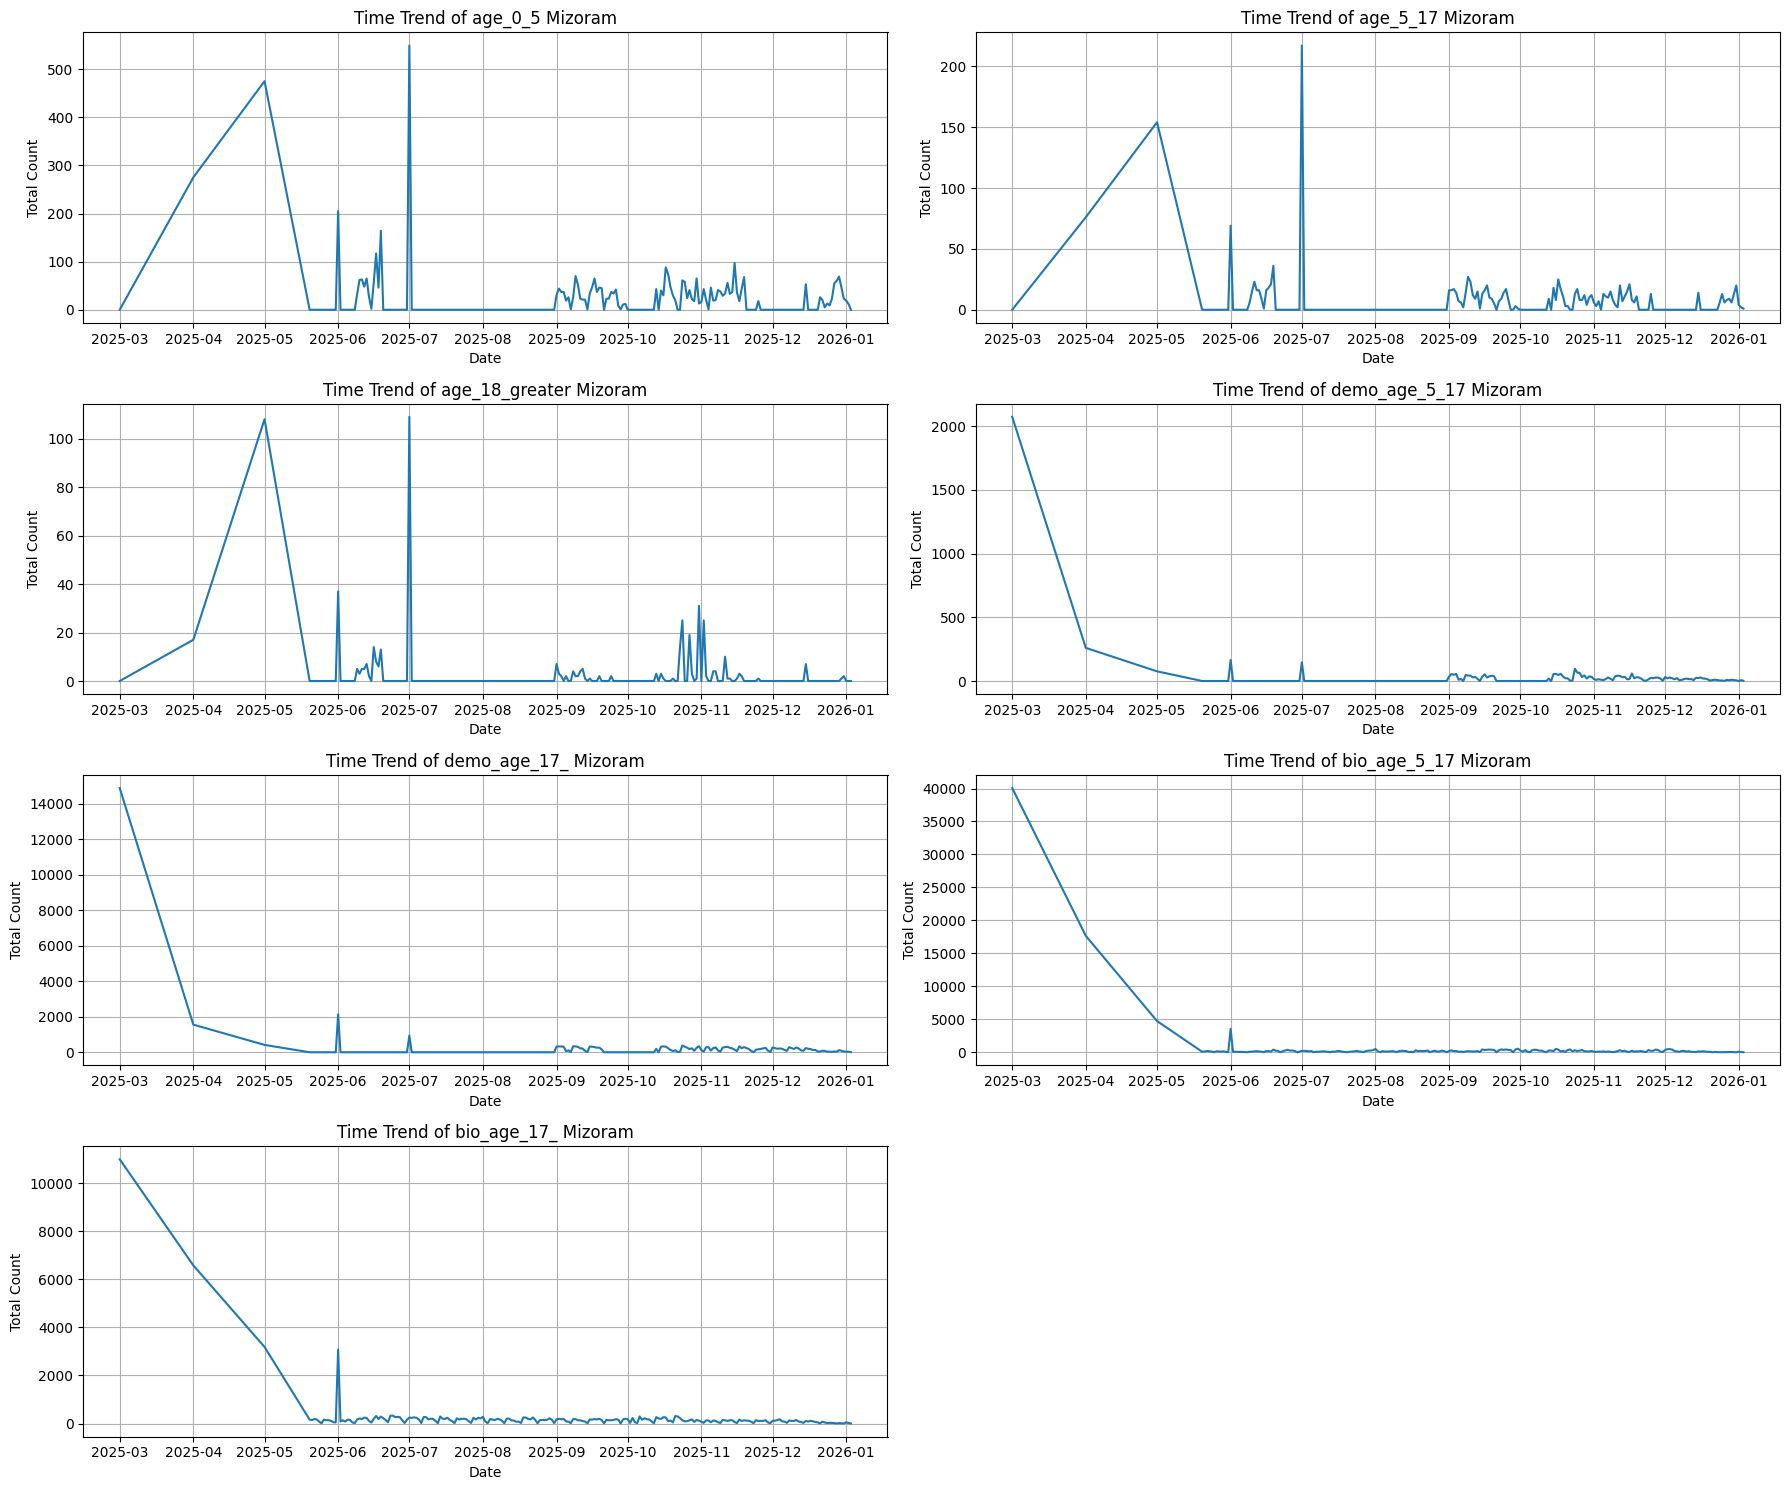

Insight: Line charts for each age-related column over time provide a clear visualization of their temporal trends, allowing for the identification of periods of high/low activity or significant changes.


In [446]:
df_mz_time_trend = df_mz_merged.groupby('date')[age_cols_to_group].sum().reset_index()

print("Time-series aggregated data (sum of age-related columns per date):")
print(df_mz_time_trend.head())
print(df_mz_time_trend.info())
plt.figure(figsize=(18, 15))
for i, col in enumerate(age_cols_to_group):
    plt.subplot(4, 2, i + 1) # Adjust subplot grid based on number of columns
    sns.lineplot(data=df_mz_time_trend, x='date', y=col)
    plt.title(f'Time Trend of {col} Mizoram')
    plt.xlabel('Date')
    plt.ylabel('Total Count')
    plt.grid(True)
plt.tight_layout()
plt.show()

print("Insight: Line charts for each age-related column over time provide a clear visualization of their temporal trends, allowing for the identification of periods of high/low activity or significant changes.")

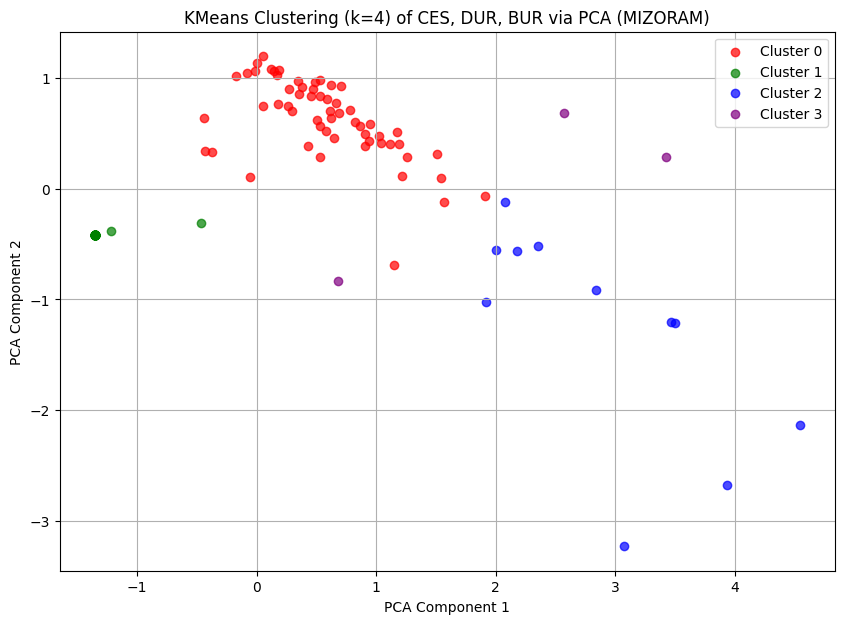

First 5 rows of df_rj_agg with 'clusterlabel' column:
   year  month    state   district  age_0_5  age_5_17  age_18_greater  \
0  2025      3  Mizoram     Aizawl      0.0       0.0             0.0   
1  2025      3  Mizoram   Champhai      0.0       0.0             0.0   
2  2025      3  Mizoram    Kolasib      0.0       0.0             0.0   
3  2025      3  Mizoram  Lawngtlai      0.0       0.0             0.0   
4  2025      3  Mizoram    Lunglei      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  ...     Bnorm   stdnorm  \
0          652.0        5121.0       12080.0  ...  1.000000  0.666667   
1          147.0        1612.0        6324.0  ...  0.497434  0.267376   
2          171.0        1103.0        3984.0  ...  0.313288  0.177990   
3           94.0        1264.0        3058.0  ...  0.251632  0.162288   
4          582.0        3274.0        4383.0  ...  0.365883  0.344607   

       ALBI  Enormrisk  CESrisknorm  DURrisknorm  BURrisknorm  ALBIr

In [443]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# 1. Select the columns for clustering
features_for_clustering = df_mz_agg[['CES', 'DUR', 'BUR']]

# 2. Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

# 3. Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10) # Added n_init=10 for newer sklearn versions
kmeans.fit(scaled_features)

# 4. Add the cluster labels to df_mz_agg
df_mz_agg['clusterlabel'] = kmeans.labels_

# 5. Apply PCA for dimensionality reduction
pca = PCA(n_components=2, random_state=42)
pca_components = pca.fit_transform(scaled_features)

# Create a DataFrame for PCA components for easier plotting
pca_df = pd.DataFrame(data=pca_components, columns=['PCA Component 1', 'PCA Component 2'])
pca_df['clusterlabel'] = df_mz_agg['clusterlabel']

# 6. Generate a PCA scatter plot to visualize these clusters
plt.figure(figsize=(10, 7))
colors = ['red', 'green', 'blue', 'purple']

for i in range(4):
    plt.scatter(
        pca_df[pca_df['clusterlabel'] == i]['PCA Component 1'],
        pca_df[pca_df['clusterlabel'] == i]['PCA Component 2'],
        c=colors[i],
        label=f'Cluster {i}',
        alpha=0.7
    )

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('KMeans Clustering (k=4) of CES, DUR, BUR via PCA (MIZORAM)')
plt.legend()
plt.grid(True)
plt.show()

print("First 5 rows of df_rj_agg with 'clusterlabel' column:")
print(df_mz_agg.head())

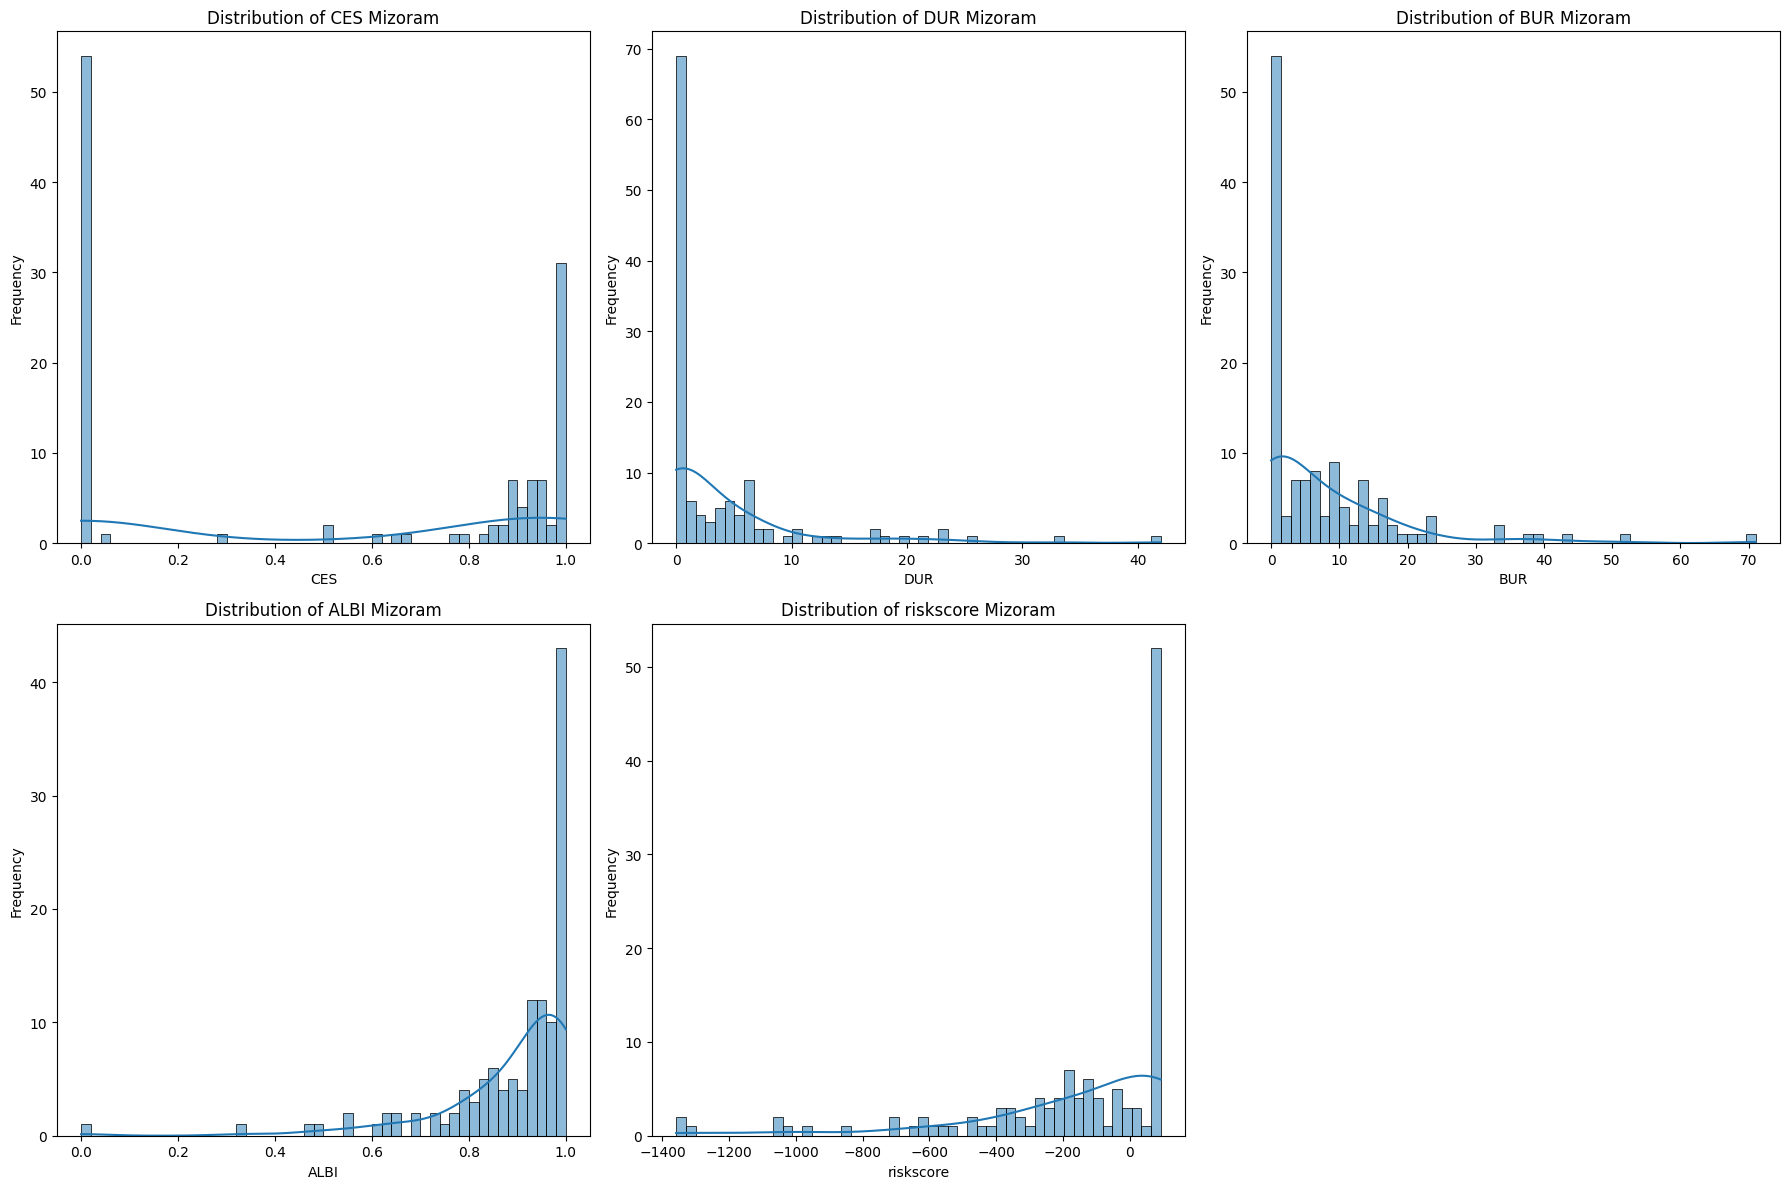

Histograms for CES, DUR, BUR, ALBI, and riskscore displayed.


In [447]:
metrics_to_plot = ['CES', 'DUR', 'BUR', 'ALBI', 'riskscore']

plt.figure(figsize=(18, 12))
for i, metric in enumerate(metrics_to_plot):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df_mz_agg[metric], bins=50, kde=True)
    plt.title(f'Distribution of {metric} Mizoram')
    plt.xlabel(metric)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

print("Histograms for CES, DUR, BUR, ALBI, and riskscore displayed.")

In [445]:
import pandas as pd

# 1. Find the latest year and month
latest_year = df_mz_agg['year'].max()
latest_month = df_mz_agg[df_mz_agg['year'] == latest_year]['month'].max()

print(f"Latest reporting period: Year {latest_year}, Month {latest_month}")

# 2. Filter df_mz_agg for the latest year and month
df_latest_month = df_mz_agg[(df_mz_agg['year'] == latest_year) & (df_mz_agg['month'] == latest_month)].copy()

# Metrics to analyze
metrics = ['CES', 'DUR', 'BUR', 'ALBI', 'riskscore']

# 3. For each metric, print top 10 and bottom 10 districts
for metric in metrics:
    print(f"\n--- Metric: {metric} ---")

    # Top 10 districts
    top_10 = df_latest_month.sort_values(by=metric, ascending=False).head(10)
    print(f"\nTop 10 Districts by {metric} (Year {latest_year}, Month {latest_month}):")
    print(top_10[['district', metric]].to_string(index=False))

    # Bottom 10 districts
    bottom_10 = df_latest_month.sort_values(by=metric, ascending=True).head(10)
    print(f"\nBottom 10 Districts by {metric} (Year {latest_year}, Month {latest_month}):")
    print(bottom_10[['district', metric]].to_string(index=False))

Latest reporting period: Year 2026, Month 1

--- Metric: CES ---

Top 10 Districts by CES (Year 2026, Month 1):
 district  CES
   Aizawl  1.0
  Kolasib  1.0
 Serchhip  1.0
Lawngtlai  1.0
  Lunglei  1.0
   Mammit  1.0
    Saiha  1.0
 Champhai  0.0
    Mamit  0.0
  Saitual  0.0

Bottom 10 Districts by CES (Year 2026, Month 1):
 district  CES
 Champhai  0.0
    Mamit  0.0
  Saitual  0.0
  Kolasib  1.0
Lawngtlai  1.0
  Lunglei  1.0
   Mammit  1.0
   Aizawl  1.0
    Saiha  1.0
 Serchhip  1.0

--- Metric: DUR ---

Top 10 Districts by DUR (Year 2026, Month 1):
 district       DUR
  Lunglei 18.000000
  Kolasib  4.000000
   Aizawl  2.000000
Lawngtlai  1.360000
 Serchhip  1.333333
    Saiha  1.000000
 Champhai  0.000000
    Mamit  0.000000
   Mammit  0.000000
  Saitual  0.000000

Bottom 10 Districts by DUR (Year 2026, Month 1):
 district       DUR
 Champhai  0.000000
    Mamit  0.000000
   Mammit  0.000000
  Saitual  0.000000
    Saiha  1.000000
 Serchhip  1.333333
Lawngtlai  1.360000
   Aizawl 

## Summary:

### Data Analysis Key Findings

*   **Data Preparation**: Initial datasets for enrolments, demographic, and biometric updates were loaded, cleaned, and merged into a single DataFrame. Missing numerical values were imputed with 0.
*   **Derived Metrics & Normalization**: Key metrics such as total enrolments, child enrolments, total demographic updates, and total biometric updates were computed. These were then normalized using min-max scaling to create `Enorm`, `Dnorm`, and `Bnorm`, which were subsequently used to calculate the `ALBI` (Aadhaar Lifecycle Balance Index), clipped between 0 and 1.
*   **Risk Score Observation**: A `riskscore` was calculated, but consistent with observations in other states, some districts displayed negative risk scores, indicating a potential issue with the metric's definition or calculation. For instance, Lunglei had a risk score of -615.90 and Kolasib had -198.26 in the latest period.
*   **Monthly Trends**: Time-series analysis revealed fluctuations in total enrolments, demographic updates, and biometric updates month-over-month.
*   **Correlation**: Strong positive correlations were observed within enrolment age groups (`age_0_5` and `age_5_17`), and within demographic and biometric update categories. Correlations between enrolment and update figures were generally weaker.
*   **District Performance (Latest Reporting Period: Year 2026, Month 1)**:
    *   **Child Enrolment Score (CES)**: Aizawl, Kolasib, Serchhip, Lawngtlai, Lunglei, Mammit, and Saiha achieved a perfect CES of 1.0, meaning all enrolments were child enrolments. Champhai, Mamit, and Saitual had a CES of 0.0, indicating no child enrolments.
    *   **Demographic Update Rate (DUR)**: Lunglei (18.0) and Kolasib (4.0) showed very high demographic update rates. Champhai, Mamit, Mammit, and Saitual had a DUR of 0.0.
    *   **Biometric Update Rate (BUR)**: Lunglei (16.0) and Kolasib (9.0) recorded the highest biometric update rates. Champhai, Mamit, and Saitual had a BUR of 0.0.
    *   **Aadhaar Lifecycle Balance Index (ALBI)**: Saitual (0.990) and Mammit (0.949) exhibited the best balance. Lawngtlai (0.0) and Lunglei (0.755) had the lowest balance.
    *   **Risk Score**: Mamit (82.01) and Champhai (81.47) had the highest positive risk scores.
*   **Clustering Analysis**: Districts were grouped into distinct clusters based on CES, DUR, and BUR metrics, highlighting varied operational profiles across Mizoram.

### Insights or Next Steps

*   The negative `riskscore` values observed across multiple states, including Mizoram, require immediate investigation and refinement of the metric's calculation to ensure accuracy, interpretability, and utility for decision-making.
*   Targeted interventions are necessary for districts with zero or low activity in specific categories (e.g., Champhai, Mamit, Saitual for child enrolments and updates), imbalanced ALBI values, and problematic risk scores to improve overall Aadhaar data quality and lifecycle management.
